In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import optimize as opt

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load data
data=pd.read_csv('machine-learning-ex2/ex2/ex2data1.txt',header=None,names=['exam1_score','exam2_score','target'])

display(data.head())
data.shape

,exam1_score,exam2_score,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


(100, 3)

In [3]:
# split dataframe into X vs. y and convert them into numpy arrays for vectorized operations
y=data.filter(['target'],axis=1).values
X=data.drop(['target'],axis=1).values

print(y[:5,])
print(X[:5,])

[[0]
 [0]
 [0]
 [1]
 [1]]
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]


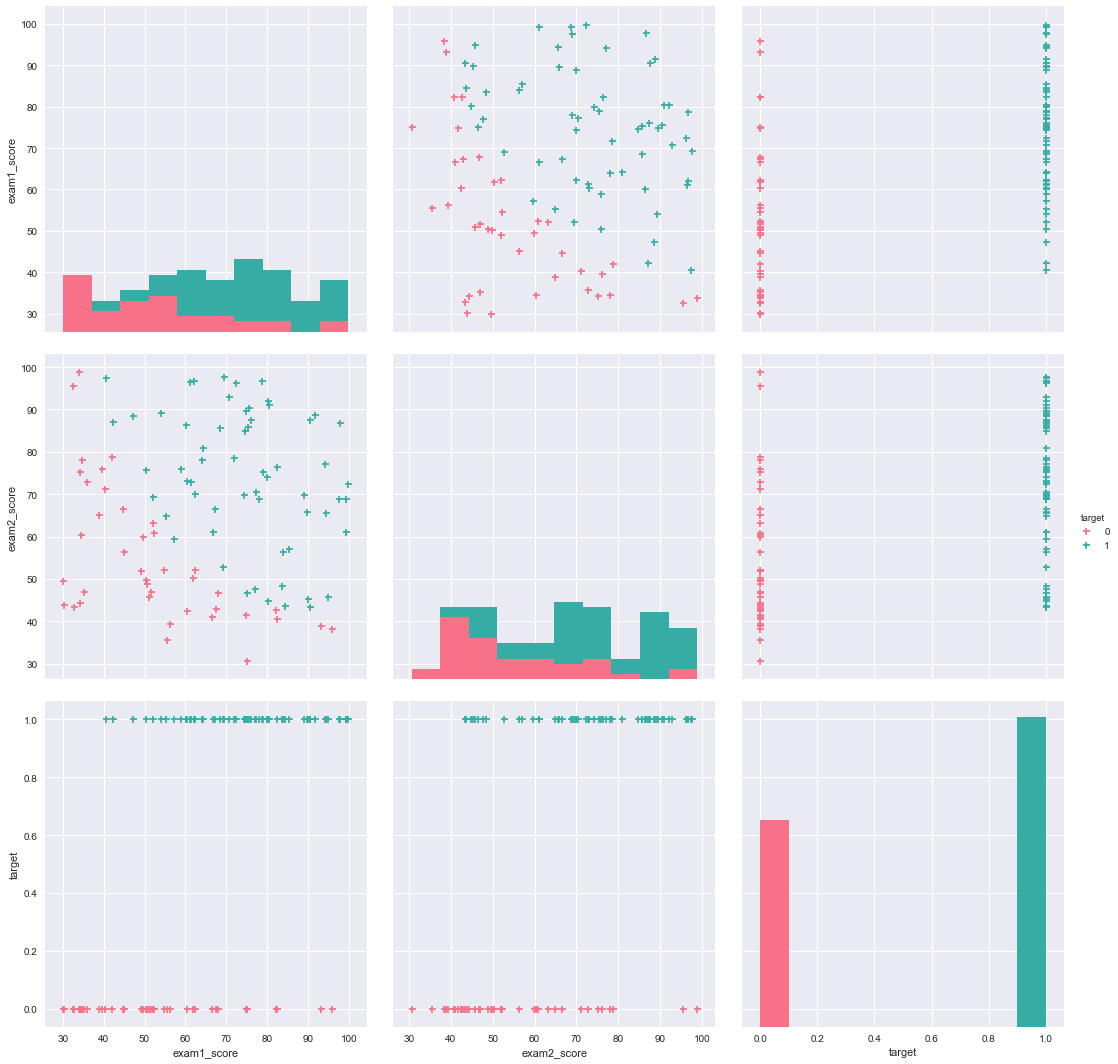

In [4]:
# visualize the data
sns.pairplot(data,hue='target',markers='+',palette='husl',size=5);

In [5]:
# construct sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
# test sigmoid function with scalar inputs
print('Log_loss=0: Prob={}'.format(sigmoid(0)))
print('Log_loss=10: Prob={}'.format(round(sigmoid(10))))
print('Log_loss=-10: Prob={}'.format(round(sigmoid(-10))))

# test sigmoid function with vector and matrices inputs
test_X=np.array([[0,10,-10],[-5,0,5]])

print('\nLog_loss of [[0,10,-10],[-5,0,5]]:')
print(np.round(sigmoid(test_X),decimals=1))

Log_loss=0: Prob=0.5
Log_loss=10: Prob=1.0
Log_loss=-10: Prob=0.0

Log_loss of [[0,10,-10],[-5,0,5]]:
[[ 0.5  1.   0. ]
 [ 0.   0.5  1. ]]


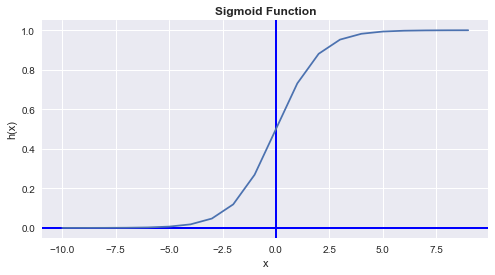

In [7]:
# visualize hypothesis function
test_x=np.arange(-10,10)

plt.figure(figsize=(8,4))
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Sigmoid Function',weight='bold')
plt.axvline([0],color='b',linewidth=2)
plt.axhline([0],color='b',linewidth=2)
plt.plot(test_x,sigmoid(test_x));

In [8]:
# construct cost function and gradient
def cost_ftn(theta,X,y):
    sample_size=X.shape[0]
    lc=np.dot(X,theta)
    cost=-sum(y*np.log(sigmoid(lc))+(1-y)*np.log(1-sigmoid(lc)))/sample_size
    return cost.ravel()

def gradient(theta,X,y):
    sample_size=X.shape[0]
    lc=np.dot(X,theta)
    delta=sigmoid(lc)-y
    gradient=np.dot(X.T,delta)/sample_size
    return gradient.ravel()

In [9]:
# test cost function and gradient
bias=np.ones((X.shape[0],1))
X_bias=np.concatenate((bias,X),axis=1)

theta_initial=np.zeros((X_bias.shape[1],1))
cost_initial=cost_ftn(theta_initial,X_bias,y)
gradient_initial=gradient(theta_initial,X_bias,y)

print("Cost at initial theta of zeros: {0:.3f}".format(np.asscalar(cost_initial)))
print("Gradient at initial theta of zeros:")
print(gradient_initial)

theta_test=np.array([[-24],[0.2],[0.2]])
cost_test=cost_ftn(theta_test,X_bias,y)
gradient_test=gradient(theta_test,X_bias,y)

print("\nCost at test theta: {0:.3f}".format(np.asscalar(cost_test)))
print("Gradient at test theta:")
print(gradient_test)

Cost at initial theta of zeros: 0.693
Gradient at initial theta of zeros:
[ -0.1        -12.00921659 -11.26284221]

Cost at test theta: 0.218
Gradient at test theta:
[ 0.04290299  2.56623412  2.64679737]


In [10]:
# approach 1: optimization using sklearn API
lr=LogisticRegression(solver='newton-cg') # 'newton-cg' is appears to be same as MatLab 'fminunc'
model=lr.fit(X,y) # use original X as intercept fitted by default 
coef=model.coef_.reshape(2,1)
inter=model.intercept_.reshape(1,1)

In [11]:
# approach 2: optimization using scipy optimize with given cost and gradient functions (to be completed...)

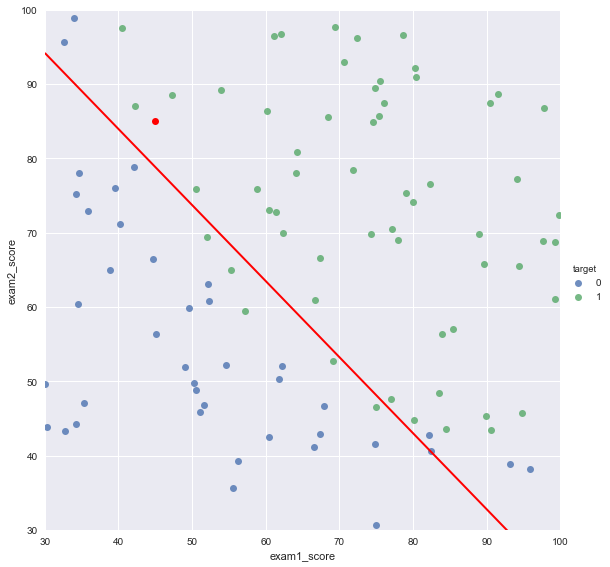

In [12]:
# draw decision boundary
x_range=[min(data['exam1_score']),max(data['exam1_score'])]
line=-(model.intercept_+coef[0]*x_range)/coef[1]

sns.lmplot('exam1_score','exam2_score',data,hue='target',fit_reg=False,size=8)
plt.axis([30,100,30,100])
plt.plot(x_range,line,color='r',linewidth=2)
plt.plot(45,85,'ro');

In [13]:
# approach 1: use sklearn for prediction and accuracy score
x=np.array([45,85]).reshape(1,2)
predicted_prb=lr.predict_proba(x)[:,1]

print('Admission probability for Exam1_Score=45 and Exam2_Score=85: {0:.3f}'
      .format(np.asscalar(predicted_prb)))

predicted_label=lr.predict(X)
score=accuracy_score(y,predicted_label)*100

print('Accuracy score: {}%'.format(score))

Admission probability for Exam1_Score=45 and Exam2_Score=85: 0.775
Accuracy score: 89.0%


In [14]:
# apporach 2: ground-up calculation for prediction and accuracy score
x=np.array([1,45,85]).reshape(1,3)
theta_hat=np.concatenate([inter,coef],axis=0)
predicted_prb=sigmoid(np.dot(x,theta_hat))

print('Admission probability for Exam1_Score=45 and Exam2_Score=85: {0:.3f}'
      .format(np.asscalar(predicted_prb)))

predicted_prb=sigmoid(np.dot(X_bias,theta_hat))
predicted_label=(predicted_prb>=0.5).astype(int)
score=np.mean(predicted_label.reshape(X_bias.shape[0],1)==y)*100

print('Accuracy score: {}%'.format(score))

Admission probability for Exam1_Score=45 and Exam2_Score=85: 0.775
Accuracy score: 89.0%
